# Lichess Dataset Analysis

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('games.csv')

# Convert into datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms') 
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20058 non-null  object        
 1   rated           20058 non-null  bool          
 2   created_at      20058 non-null  datetime64[ns]
 3   last_move_at    20058 non-null  datetime64[ns]
 4   turns           20058 non-null  int64         
 5   victory_status  20058 non-null  object        
 6   winner          20058 non-null  object        
 7   increment_code  20058 non-null  object        
 8   white_id        20058 non-null  object        
 9   white_rating    20058 non-null  int64         
 10  black_id        20058 non-null  object        
 11  black_rating    20058 non-null  int64         
 12  moves           20058 non-null  object        
 13  opening_eco     20058 non-null  object        
 14  opening_name    20058 non-null  object        
 15  op

# Exploratory Data Analysis

## Class Imbalance

In [3]:
print('Percentage of Winners in the game')
class_imb = round(df['winner'].value_counts(normalize=True)*100, 2)
for ind in class_imb.index:
    print(f'{ind.capitalize()} = {class_imb[ind]} %')

print('\nNumber of Draw games = ', df['winner'].value_counts()['draw'])

Percentage of Winners in the game
White = 49.86 %
Black = 45.4 %
Draw = 4.74 %

Number of Draw games =  950


As `White` win and `Black` win percentages are close to each other, we can say that there is no class imbalance here. The `Draw` percentage is very small but the number of games is significant amount, so we will make observations in this as well

## Nature of Victory

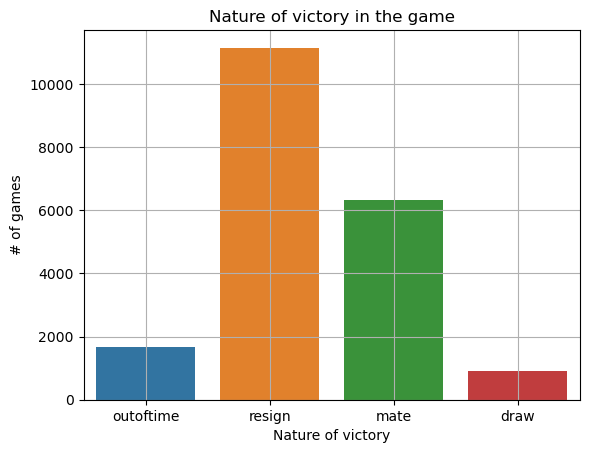

In [4]:
sns.countplot(data=df, x='victory_status')
plt.title('Nature of victory in the game')
plt.xlabel('Nature of victory')
plt.ylabel('# of games')
plt.grid(True)
plt.show()

It can be observed that players tend to resign than to continue until the end

In [5]:
# Split increment_code:
df['base_time'] = df['increment_code'].str.split('+').str[0].astype(int)
df['increment_time'] = df['increment_code'].str.split('+').str[1].astype(int)

# categorize the games
conditions = [
    (df['base_time'] < 3),
    (df['base_time'] >= 3) & (df['base_time'] < 10),
    (df['base_time'] >= 10) & (df['base_time'] < 30),
    (df['base_time'] >= 30)
]

choices = ['Bullet', 'Blitz', 'Rapid', 'Classical']

df['game_category'] = np.select(conditions, choices, default='Unknown')

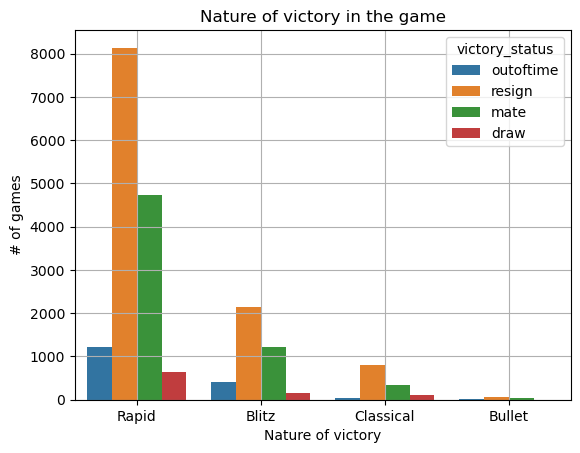

In [7]:
sns.countplot(data=df, x='game_category', hue='victory_status')
plt.title('Nature of victory in the game')
plt.xlabel('Nature of victory')
plt.ylabel('# of games')
plt.grid(True)
plt.show()